In [1]:
import sys
sys.path.insert(0, '../models')

from drn import make_drn
from chainer import serializers

model = make_drn(out_map=True)
serializers.load_npz('../models/drn.npz', model)

/home/shunta/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/cupy-3.0.0a1-py3.6-linux-x86_64.egg/cupy/core/fusion.py:659: FutureWarning: cupy.core.fusion is experimental. The interface can change in the future.
  util.experimental('cupy.core.fusion')


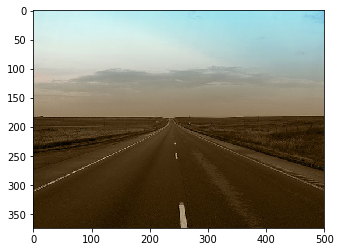

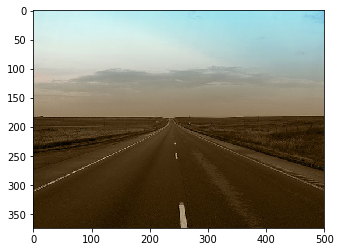

(1, 3, 374, 500)


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
from PIL import Image

img = cv.imread('../road_images/1003602154_9acbe3be0d.jpg')
img = img.astype(np.float32)[:, :, ::-1]  # to RGB

img_ = np.array(Image.open('../road_images/1003602154_9acbe3be0d.jpg'), dtype=np.float32) / 255.
plt.imshow(img_)
plt.show()

plt.clf()
plt.imshow(img / 255.)
plt.show()

img = img.transpose(2, 0, 1)[None, ...]
print(img.shape)

y = model.predict(img)

In [ ]:
y.shape

In [ ]:
for i in y.array[0]:
    plt.clf()
    plt.imshow(i) 
    plt.show()